In [16]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.io as spio
from PIL import Image
from IPython.display import display

# Projeto 1 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: Geraldo Teixeira do Nascimento Filho
## Matrícula: 202024740

# Questão 1

## Questão 1a (0.5 pontos)

O objetivo deste exercício é estudar a decimação e a interpolação de sinais. 
Escreva uma função em python que receba um sinal x[n] e retorne um sinal y[n] que seja a decimação por um fator de 2 do sinal de entrada x[n]. 

Em seguida, use a sua função para encontrar o sinal decimado para a entrada: 

$$ x = \left[1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0 \right]$$

In [17]:
### Código da questão 1a.

x_n = np.array([1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0])

def decimation_factor_2(array_x_n):
    return array_x_n[::2]

y_n = decimation_factor_2(x_n)
print(f'x[n] decimado por um fator de 2 (y[n]): {y_n}')

x[n] decimado por um fator de 2 (y[n]): [1 1 1 1 1 1 1 1 1 1]


## Questão 1b (0.5 pontos)

Escreva uma função em python que receba um sinal y[n] e retorne um sinal z[n] que seja a interpolação por um fator de 2 do sinal de entrada y[n]. A sua função deve aumentar o número de amostras e assinalar um novo valor para as amostras criadas. Você pode escolher se as amostras interpoladas terão o valor médio das amostras ou o valor da amostra anterior. 

Em seguida, utilize a sua função para encontrar o sinal interpolado para o sinal y[n] da questão anterior (1a).


In [18]:
### Código da questão 1b.

def interpolation_factor_2(array_x_n):
    interpolated_array = [0]*(len(array_x_n)*2)
    
    for i in range(len(array_x_n)):
        interpolated_array[2*i] = array_x_n[i]
        
    for i in range(len(array_x_n)-1):
        interpolated_array[2*i+1] = round((array_x_n[i] + array_x_n[i+1]) / 2)

    interpolated_array[-1] = array_x_n[-1]
    
    return interpolated_array



z_n = interpolation_factor_2(y_n)
print(f'y[n] interpolado por um fator de 2 (z[n]): {z_n}')


y[n] interpolado por um fator de 2 (z[n]): [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## Questão 1c (1 ponto)

Uma imagem é um sinal discreto de duas dimensões. 
Escrevemos I(x,y) para representar esta imagem como uma matriz bidimensional de dimensões (w x h), onde w é a largura da imagem e h a sua altura.

Para imagens, fazemos a decimação e a interpolação separadamente, para todas as linhas e, em seguida, para todas as colunas (ou vice-versa), considerando que cada linha ou coluna é um sinal de uma dimensão.

Aplique o seu algoritmo de decimação sucessivamente até obter uma imagem com tamanho (w/16 x h/16), isto é, aplique o algoritmo 4 vezes seguidas, mostrando a imagem resultante.

Imagem original de tamanho: 512 x 512:


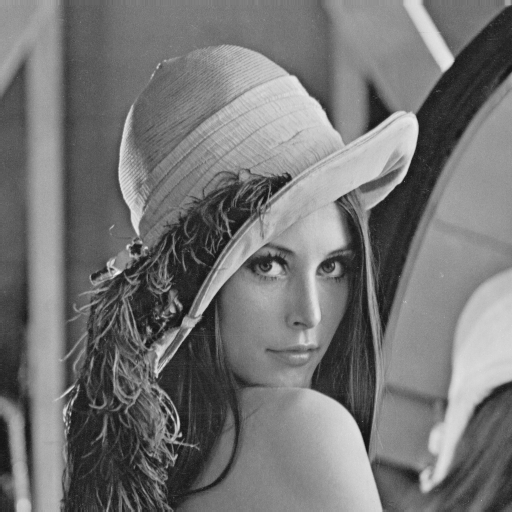




Imagem interpolada resultante, de tamanho: 32 x 32:


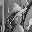

In [19]:
lena_image = Image.open("lena.bmp")  
matrix_lena_image = np.array(lena_image).astype(np.int32)          
h, w = matrix_lena_image.shape
print(f'Imagem original de tamanho: {h} x {w}:')
display(lena_image)

def change_sampling_rate(image_matrix, sampling_rate_type):
    temp_matrix1 = []
    temp_matrix2 = []

    if sampling_rate_type == 'decimate_factor_2':
        for line in image_matrix:
            temp_matrix1.append(decimation_factor_2(line))
        temp_matrix1 = list(zip(*temp_matrix1)) # transposição da matriz

        for line in temp_matrix1:
            temp_matrix2.append(decimation_factor_2(line))
        temp_matrix2 = list(zip(*temp_matrix2)) # transposição da matriz novamente


    elif sampling_rate_type == 'interpolate_factor_2':
        for line in image_matrix:
            temp_matrix1.append(interpolation_factor_2(line))
        temp_matrix1 = list(zip(*temp_matrix1)) # transposição da matriz

        for line in temp_matrix1:
            temp_matrix2.append(interpolation_factor_2(line))
        temp_matrix2 = list(zip(*temp_matrix2)) # transposição da matriz novamente

    return np.array(temp_matrix2)

matrix_lena_image_decimated = matrix_lena_image

for _ in range(4):
    matrix_lena_image_decimated = change_sampling_rate(matrix_lena_image_decimated, 'decimate_factor_2')

decimated_lena_image = Image.fromarray(np.uint8(matrix_lena_image_decimated))
matrix_lena_image_decimated = np.array(decimated_lena_image).astype(np.int32) # conversão para 32 bits para evitar overflow

h2, w2 = matrix_lena_image_decimated.shape

print(f'\n\n\nImagem interpolada resultante, de tamanho: {h2} x {w2}:')
display(decimated_lena_image)

## Questão 1d (1 ponto)

Utilizando como entrada a imagem decimada (de tamanho w/16 x h/16) da questão anterior (1c), aplique o seu algoritmo de interpolação sucessivamente até obter uma imagem com tamanho (w x h), isto é, aplique o algoritmo 4 vezes seguidas, mostrando a imagem resultante. Compare a imagem original com a imagem que foi decimada/interpolada. 

Imagem interpolada resultante, de tamanho: 512 x 512:


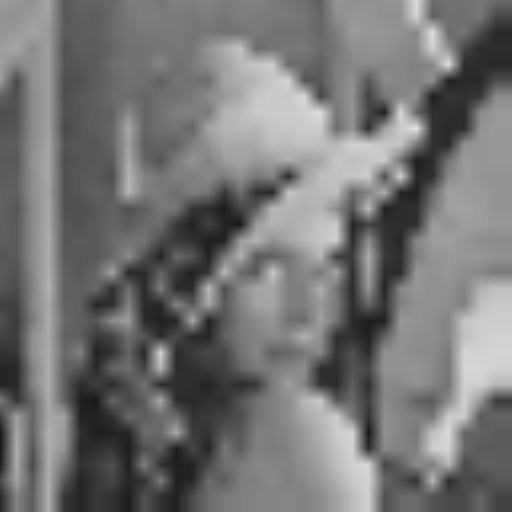

In [20]:
### Código da questão 1d.

matrix_lena_image_interpolated = matrix_lena_image_decimated
for _ in range(4):
    matrix_lena_image_interpolated = change_sampling_rate(matrix_lena_image_interpolated, 'interpolate_factor_2')

interpolated_lena_image = Image.fromarray(np.uint8(matrix_lena_image_interpolated))

matrix_lena_image_interpolated = np.array(interpolated_lena_image)
h3, w3 = matrix_lena_image_interpolated.shape

print(f'Imagem interpolada resultante, de tamanho: {h3} x {w3}:')
display(interpolated_lena_image)


# Questão 2

Considere o seguinte sistema LDIT:
$$ y\left[n+2\right] + \frac{1}{6}y\left[n\right] = x\left[n+2\right] + 2x\left[n+1\right]+x\left[n\right] $$
$$ x\left[n\right] = \left(\frac{1}{4}\right)^n u\left[n\right] $$
$$ y\left[-1\right] = y\left[-2\right] = 0 $$

## Questão 2a (1 ponto)

Determine a resposta ao impulso h[n] analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

In [21]:
### Código da questão 2a.

# TODO lembrar de adicionar a imagem AQUI!!!!!!!!!!!!!!!!!

## Questão 2b (1 ponto)
Escreva um código para obter a resposta ao impulso h[n] iterativamente. Compare a resposta obtida iterativamente com a resposta analítica para as primeiras 100 amostras, plotando o gráfico das duas respostas.

Calcule também o erro médio quadrático entre os dois sinais, h[n] analítico e g[n] iterativo, através da equação:

$$ MSE = \frac{1}{N} \sum_{i=0}^{N-1} \left( h\left[i\right] - g\left[i\right] \right)^2 $$

onde N é o número de amostras considerado (no caso, 100 amostras).

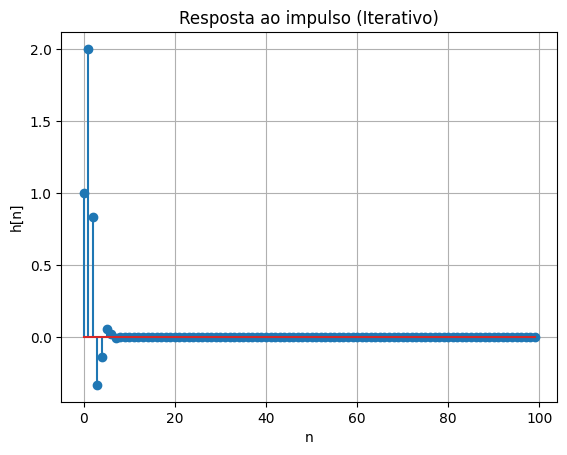

In [28]:
### Código da questão 2b.

# resposta ao impulso
def h(n):
    x = np.zeros(n)
    x[0] = 1

    h = np.zeros(n)
    h[0] = 1
    h[1] = 2

    for n in range(n-2):
        h[n + 2] = x[n + 2] + 2 * x[n + 1] + x[n] - (1/6) * h[n]
    
    return h

    
plt.stem(h(100))
plt.xlabel("n")
plt.ylabel("h[n]")
plt.title("Resposta ao impulso (Iterativo)")
plt.grid(True)
plt.show()

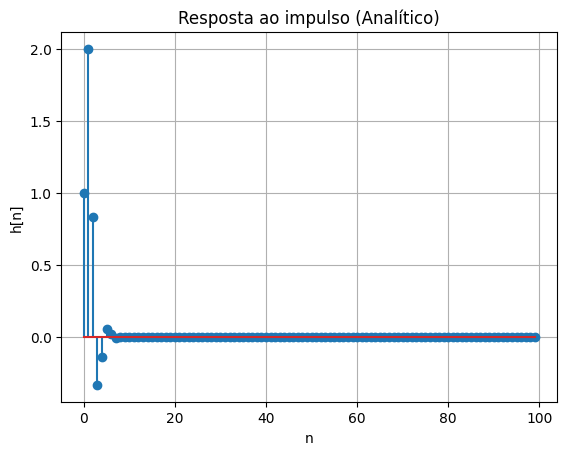

MSE = 1.2778664673553766e-33


In [29]:
### Código da questão 2b.

# inicializa a resposta ao impulso
x = np.zeros(100)
x[0] = 1

h1 = np.zeros(100)
h1[0] = 1
    
for n in range(1,100):
    h1[n] = (7*((1/np.sqrt(6))**n))*(np.cos((np.pi/2)*n+(np.arctan2(-np.sqrt(6),-2.5)))) # é necessário usar arctan2 para obter o ângulo no quadrante correto

    
plt.stem(h1)
plt.xlabel("n")
plt.ylabel("h[n]")
plt.title("Resposta ao impulso (Analítico)")
plt.grid(True)
plt.show()

mse = np.sum(((h(100) - h1)**2)*0.01)
print("MSE =", mse)

## Questão 2c (1 ponto)

Determine a resposta do sistema às condições iniciais dadas analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

In [23]:
### Código da questão 2c.

# TODO colocar imagem aqui!!!!!!!!!!!!!!!

### Questão 2d (1 ponto)
Escreva um programa para obter a resposta do sistema através da convolução da entrada com a resposta ao impulso h[n] truncada para as primeiras 20 amostras (isto é, considerando apenas as primeiras 20 amostras de h[n]).

Compare a resposta obtida pela convolução com a resposta obtida analiticamente, plotando o gráfico das duas respostas (calcule as primeiras 100 amostras do sinal). Calcule também o erro médio quadrático entre os dois sinais.

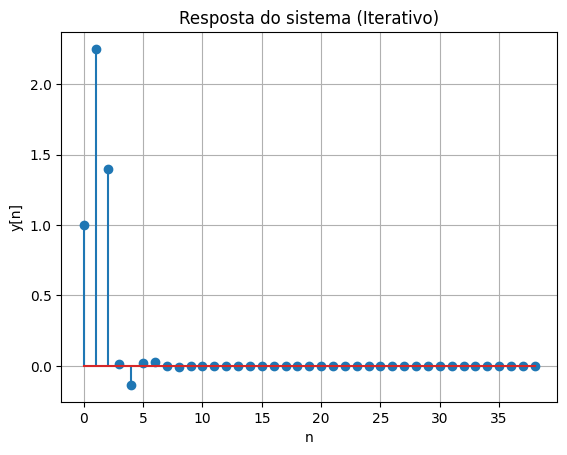

In [30]:
### Código da questão 2d.

x = np.zeros(20)
for i in range(20):
    x[i] = (0.25)**i

y = np.convolve(h(20), x)

plt.stem(y)
plt.xlabel("n")
plt.ylabel("y[n]")
plt.title("Resposta do sistema (Iterativo)")
plt.grid(True)
plt.show()

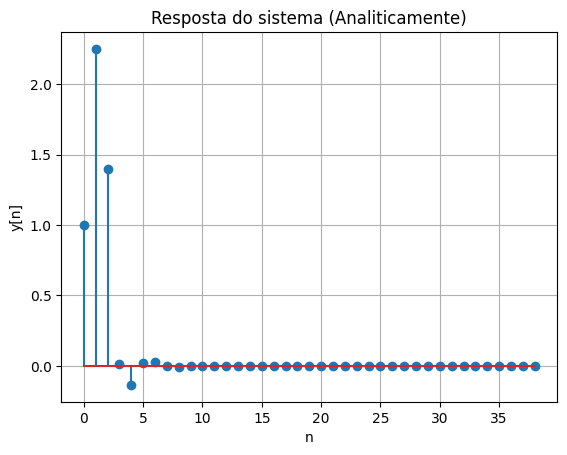

MSE = 5.215178024321721e-11


In [32]:
y1 = np.zeros(39)

for n in range(39):
    y1[n] = ((75/11)* (0.25)**n) - (((14 * (22)**0.5)/11)* (((6**0.5)/6)**n) * np.cos((0.5 * np.pi * n) + 0.2257))

plt.stem(y1)
plt.xlabel("n")
plt.ylabel("y[n]")
plt.title("Resposta do sistema (Analiticamente)")
plt.grid(True)
plt.show()

msey = np.sum((y - y1)**2 * 0.01)
print("MSE =", msey)


## Questão 2e (1 ponto)

Usando como entrada o sinal disponibilizado ('data_projeto1.mat'), determine a resposta do sistema. Plote o gráfico da entrada e da saída do sistema. 

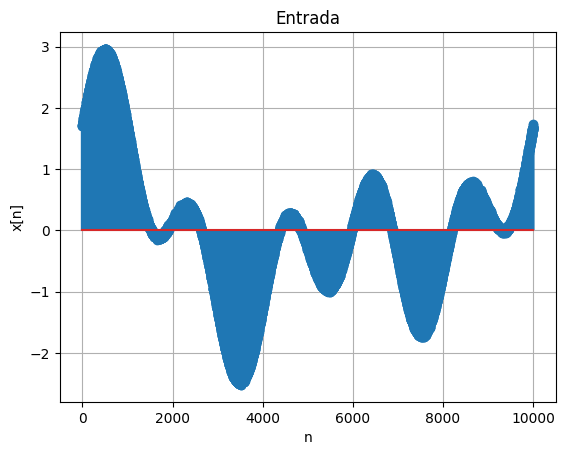

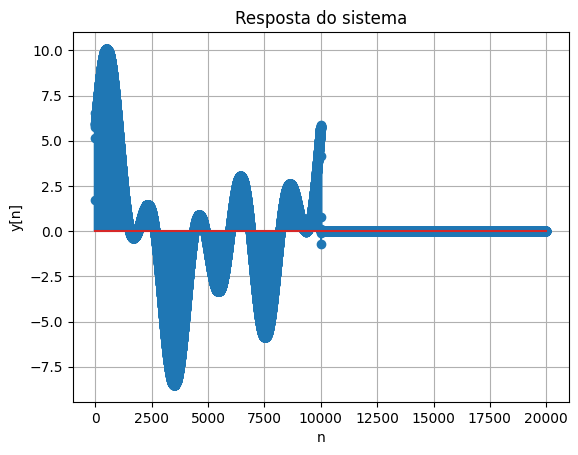

In [33]:
### Códgio da Questão 2e
sinal = spio.loadmat('data_projeto1.mat')['sinal'].ravel()


resposta = np.convolve(sinal, h(10001))

plt.stem(sinal)
plt.xlabel("n")
plt.ylabel("x[n]")
plt.title("Entrada")
plt.grid(True)
plt.show()


plt.stem(resposta)
plt.xlabel("n")
plt.ylabel("y[n]")
plt.title("Resposta do sistema")
plt.grid(True)
plt.show()

# Questão 3
Considere o seguinte sistema LDIT:
$$ y\left[n+2\right] -2~\cos \left( \frac{\pi}{8} \right) y\left[n+1\right] + y\left[n\right] = x\left[n\right] $$

## Questão 3a (1 ponto)
Determine a resposta ao impulso h[n] analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

In [26]:
### Código da questão 3a

# TODO colocar imagem aqui !!!!!!!!!!!

## Questão 3b (1 ponto)
Escreva um programa para obter a resposta ao impulso h[n] iterativamente. Compare a resposta obtida com a resposta analítica, plotando o gráfico das duas respostas para as primeiras 100 amostras. Calcule também o erro médio quadrático entre os dois sinais.

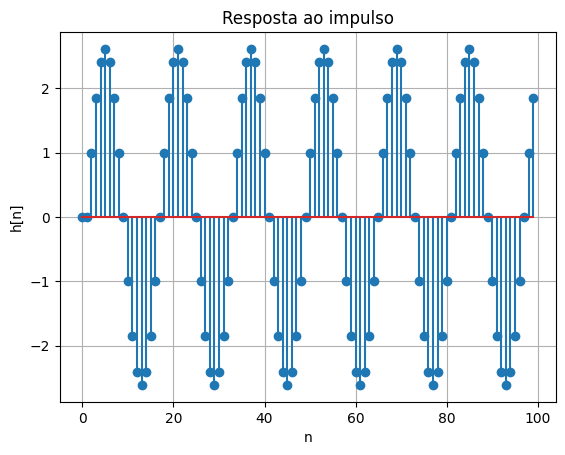

In [34]:
### Código da questão 3b

x = np.zeros(100)
x[0] = 1

h = np.zeros(100)

h[0] = 0
h[1] = 0

for n in range(98):
    h[n+2] = 2*np.cos(np.pi/8) * h[n+1] - h[n] + x[n]

plt.stem(h)
plt.xlabel("n")
plt.ylabel("h[n]")
plt.title("Resposta ao impulso")
plt.grid(True)
plt.show()


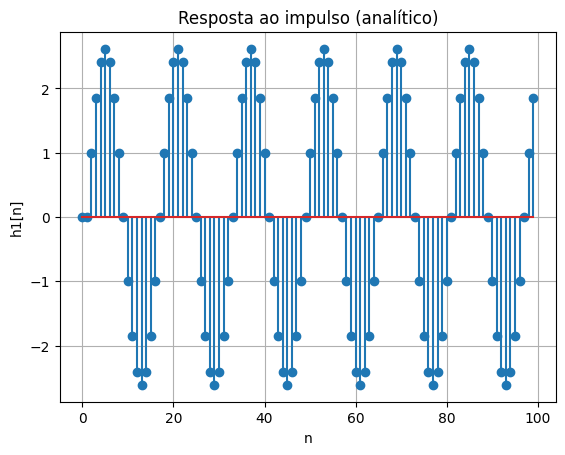

MSE = 1.7534906462369218e-29


In [35]:
x1 = np.zeros(100)
x1[0] = 1

h1 = np.zeros(100)

def u(n):
    if n >= 0:
        return 1
    else:
        return 0

for n in range(100):
    h1[n] = (2*u(n-2) * np.sin(1/8 * np.pi * (n-1)))/np.sqrt(2-np.sqrt(2))

plt.stem(h1)
plt.xlabel("n")
plt.ylabel("h1[n]")
plt.title("Resposta ao impulso (analítico)")
plt.grid(True)
plt.show()

mseh = np.sum((h - h1)**2 * 0.01)
print("MSE =", mseh)